In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot

In [3]:
df = pd.read_csv('C:/Users/HOME/Dropbox/dataset/used/archive/weatherAUS.csv', usecols=['Date', 'Location', 'MinTemp', 'MaxTemp'])
df.head()

,Date,Location,MinTemp,MaxTemp
0,2008-12-01,Albury,13.4,22.9
1,2008-12-02,Albury,7.4,25.1
2,2008-12-03,Albury,12.9,25.7
3,2008-12-04,Albury,9.2,28.0
4,2008-12-05,Albury,17.5,32.3


In [4]:
sydney = df.query("Location == 'Sydney'")
sydney = sydney.drop('Location', axis=1)
sydney['Date'] = sydney['Date'].astype('datetime64')
sydney['Month'] = sydney['Date'].dt.month_name()

sydney.head()

,Date,MinTemp,MaxTemp,Month
30176,2008-02-01,19.5,22.4,February
30177,2008-02-02,19.5,25.6,February
30178,2008-02-03,21.6,24.5,February
30179,2008-02-04,20.2,22.8,February
30180,2008-02-05,19.7,25.7,February


In [5]:
from pandas.api.types import CategoricalDtype

cat_month = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

sydney['Month'] = sydney['Month'].astype(cat_month)

sydney.dtypes

Date       datetime64[ns]
MinTemp           float64
MaxTemp           float64
Month            category
dtype: object

<Figure size 432x288 with 0 Axes>

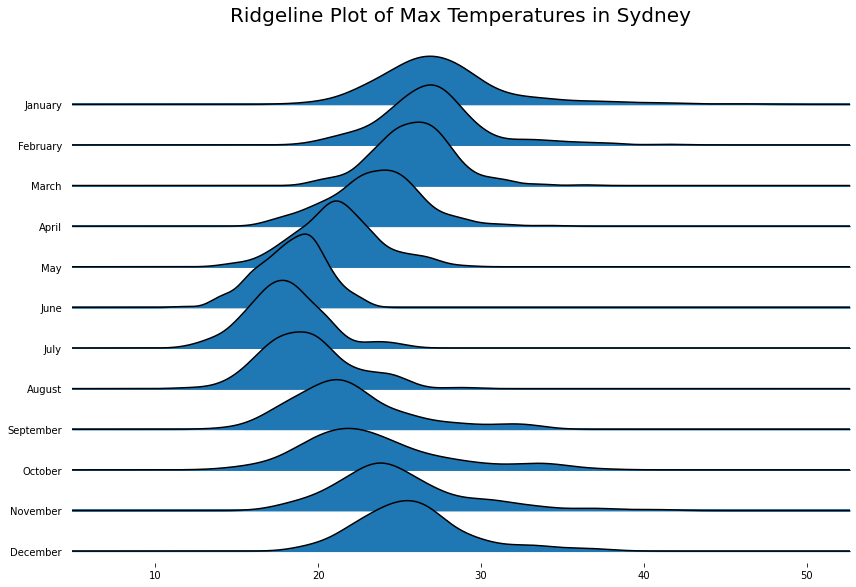

In [6]:
plt.figure()

joyplot(
    data=sydney[['MaxTemp', 'Month']], 
    by='Month',
    figsize=(12, 8)
)
plt.title('Ridgeline Plot of Max Temperatures in Sydney', fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

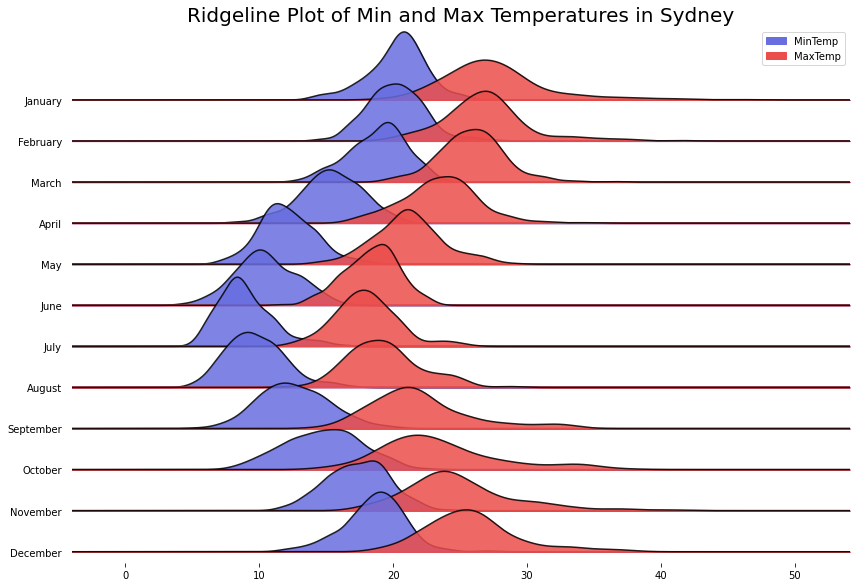

In [7]:
plt.figure()

ax, fig = joyplot(
    data=sydney[['MinTemp', 'MaxTemp', 'Month']], 
    by='Month',
    column=['MinTemp', 'MaxTemp'],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(12, 8)
)
plt.title('Ridgeline Plot of Min and Max Temperatures in Sydney', fontsize=20)
plt.show()